In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [2]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
184,CommunityCrime,random,162,0.551358,0.522396
454,IstanbulStock,even,46,0.428664,0.744071
329,AutoMPG,distort,74,0.809345,0.800719
321,AutoMPG,distort,10,0.890436,0.876825
128,EnergyEfficiency,distort,130,0.864589,0.863195


In [3]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.944973,0.895982
46,Hydrodynamics,even,0.000619,0.988501
47,Hydrodynamics,random,-0.002573,0.940687
48,Hydrodynamics,skewed,-0.000754,0.983942
49,Hydrodynamics,turn,0.944973,0.944830


<Axes: xlabel='csv_file'>

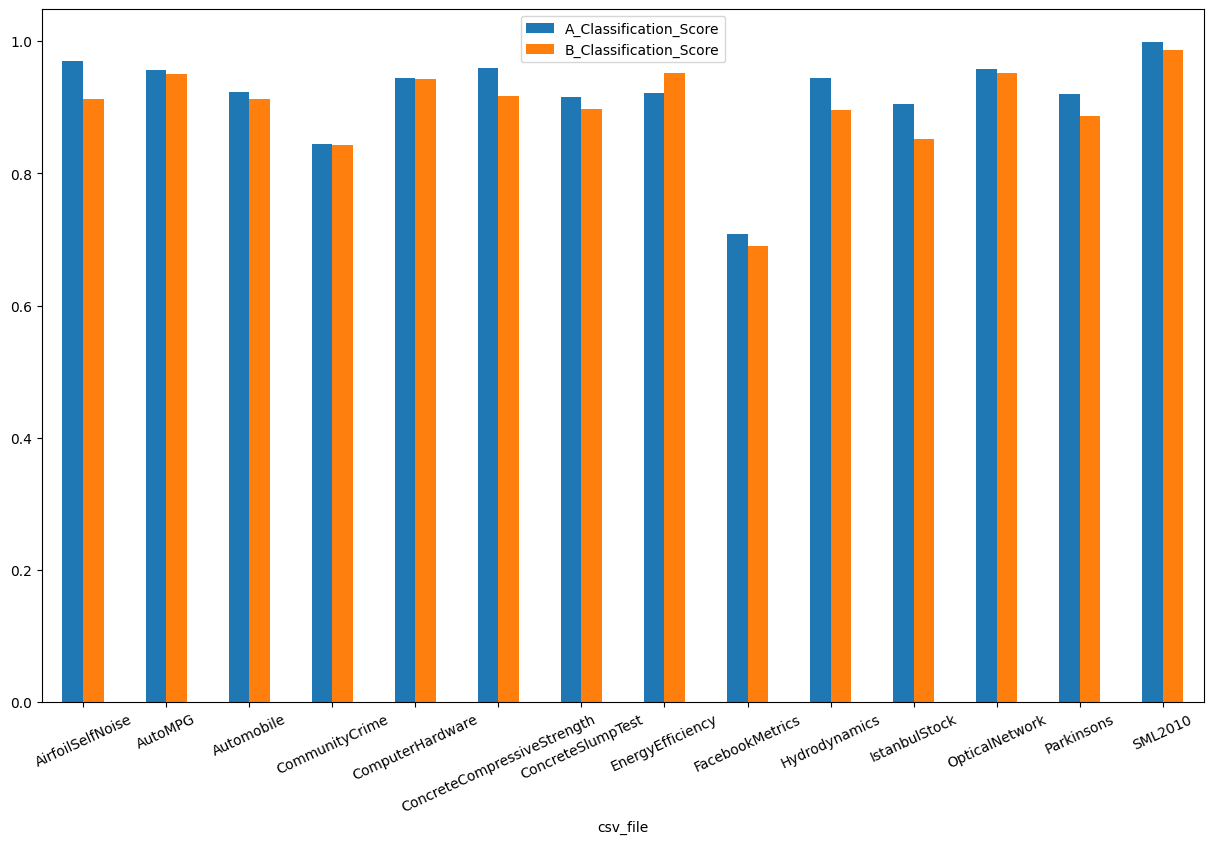

In [4]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [5]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
reg_df.sample(5)


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
13,RF-SPUD,EnergyEfficiency,distort,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...","{'42': 0.8121831590229085, '1738': 0.752614766...","{'42': 0.10237206353081599, '1738': 0.08114963...","{'42': 0.9077947055849279, '1738': 0.844413173...","{'42': 0.8893566080989732, '1738': 0.792266579...","{'42': 0.8956532535800237, '1738': 0.782204644...","{'42': 0.3268493925986728, '1738': 0.471728087...","{'42': 0.33656656219118447, '1738': 0.46070254...","{'42': {'RF-OOB': 0.7161826988186542, 'KNN': 0...",{}
21,RF-MASH-,EnergyEfficiency,distort,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...","{'42': 0.9536421356992152, '1738': 0.936031731...","{'42': 0.023270501030815974, '1738': 0.0330166...","{'42': 0.9464953749227066, '1738': 0.949880362...","{'42': 0.9186736860032524, '1738': 0.934481129...","{'42': 0.8936035035851404, '1738': 0.908519069...","{'42': 0.33004403630378437, '1738': 0.30572624...","{'42': 0.28855178860286057, '1738': 0.25873228...","{'42': {'RF-OOB': 0.928056839063742, 'KNN': 0....","{'knn': 0.4877787135541637, 'page_rank': 0.109..."
18,RF-SPUD,EnergyEfficiency,distort,0.3,"{'knn': 2, 'OD_method': 'mean', 'agg_method': ...","{'42': -0.192470811818084, '1738': -0.21458469...","{'42': 0.0006476508246527779, '1738': 0.000751...","{'42': -0.04180558303252302, '1738': -0.058410...","{'42': -0.0639167528812914, '1738': 0.00451963...","{'42': -0.013287707883772759, '1738': -0.00538...","{'42': 1.0185318480465209, '1738': 1.013521904...","{'42': 1.0436672363117654, '1738': 1.008518288...","{'42': {'RF-OOB': 0.07738437212905391, 'KNN': ...",{}
12,RF-NAMA,EnergyEfficiency,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.13461892395456942, '1738': -0.168589...","{'42': 0.0012139214409722222, '1738': 0.001893...","{'42': -0.07127906095629388, '1738': -0.059872...","{'42': -0.019851230330367287, '1738': -0.05404...","{'42': -0.01663770379088847, '1738': -0.038411...","{'42': 1.0202141254538202, '1738': 1.030035584...","{'42': 1.0218252689674507, '1738': 1.037760781...","{'42': {'RF-OOB': 0.08598673712538951, 'KNN': ...",{}
8,RF-NAMA,Hydrodynamics,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.0791592588335388, '1738': -0.2326409...","{'42': 0.0002424523528419632, '1738': 0.000147...","{'42': 0.07656513461946646, '1738': 0.27149396...","{'42': -0.14287279399910302, '1738': 0.1726058...","{'42': -0.10191152927486313, '1738': 0.2310736...","{'42': 0.8440157537475068, '1738': 0.954922052...","{'42': 0.85955988005132, '1738': 0.99056225425...","{'42': {'RF-OOB': 0.14176440491586106, 'KNN': ...",{}


In [6]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [7]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
8,RF-NAMA,Hydrodynamics,distort,0.3,-0.152076,0.000133,0.137420,-0.050956,0.007105,0.919532,0.946028,"{'42': {'RF-OOB': 0.14176440491586106, 'KNN': ...",-0.152209,0.944973,0.895982
11,RF-SPUD,EnergyEfficiency,distort,0.3,-0.140364,0.002048,0.574103,0.510883,0.357252,0.811993,0.707735,"{'42': {'RF-OOB': 0.5282935940890259, 'KNN': 0...",-0.142412,0.921075,0.952433
18,RF-SPUD,EnergyEfficiency,distort,0.3,-0.208233,0.000581,-0.035852,-0.028886,-0.003295,1.016238,1.029087,"{'42': {'RF-OOB': 0.07738437212905391, 'KNN': ...",-0.208814,0.921075,0.952433


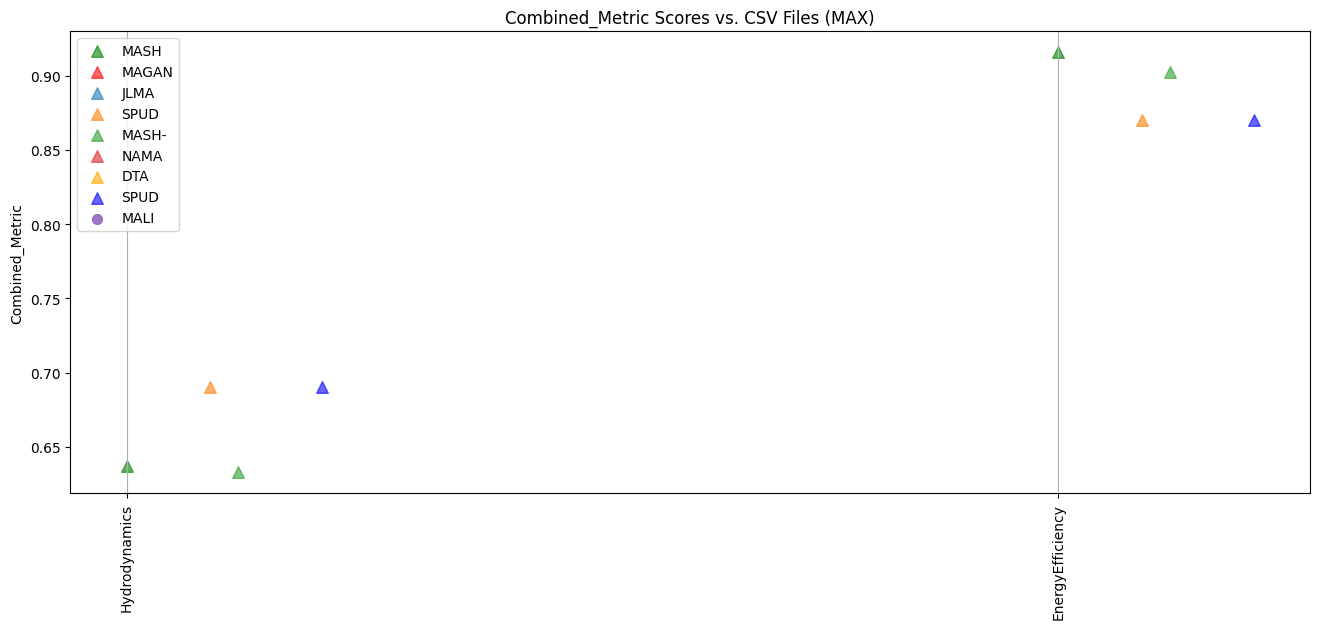

In [8]:
plt_methods_by_CSV_max(df = proc_reg_df, plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [9]:
proc_reg_df.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'GRAE', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score'],
      dtype='object')

ValueError: x and y must have same first dimension, but have shapes (7,) and (43,)

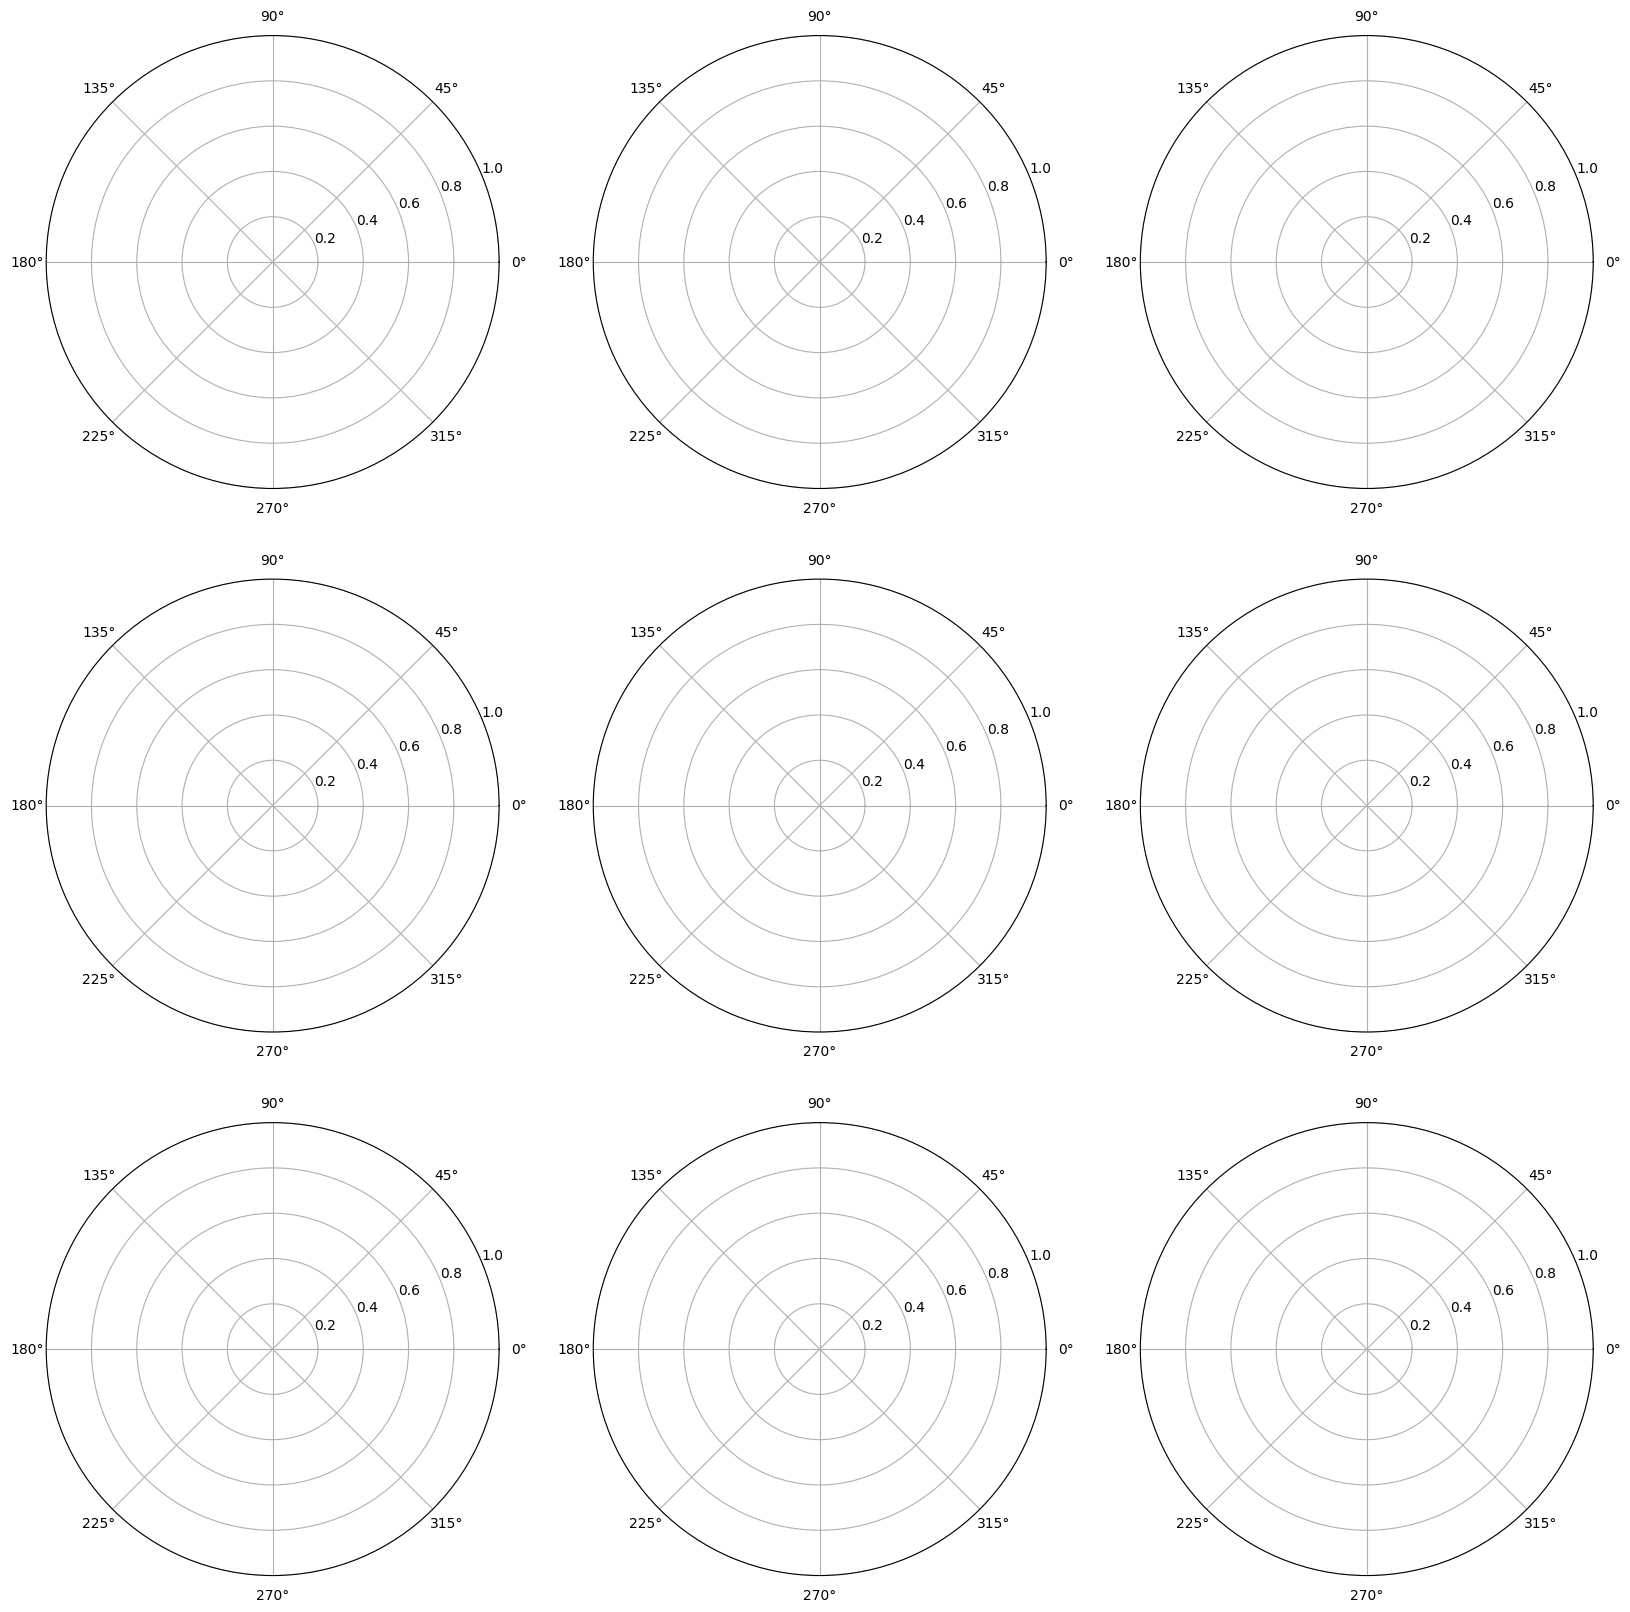

In [10]:
plot_radial(proc_reg_df.drop(columns="GRAE"), ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [ ]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
19,MASH,EnergyEfficiency,distort,0.3,0.916783,0.001012,0.911103,0.898587,0.885365,0.343392,0.322916,"{'42': {'RF-OOB': 0.9089383667663025, 'KNN': 0...",0.915771,0.921075,0.952433
16,RF-MASH,EnergyEfficiency,distort,0.3,0.889830,0.002089,0.953580,0.926123,0.911869,0.300730,0.275230,"{'42': {'RF-OOB': 0.9559451802993845, 'KNN': 0...",0.887741,0.921075,0.952433


In [ ]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
0,0.579753,0.520428,0.741669,0.802145,0.406118
1,0.293236,0.675014,0.335470,0.255644,0.652477
2,0.440004,0.601686,0.628104,0.814092,0.490329
3,0.889319,0.266198,0.815305,0.935920,0.332952
4,0.030358,0.791532,0.451558,0.606978,0.594386
5,0.187413,0.724455,0.305868,0.506355,0.669138
6,0.242498,0.693464,0.226210,0.211298,0.705817
7,0.445678,0.598585,0.710613,0.811848,0.431071
8,0.161957,0.732958,0.355406,0.211046,0.640581
9,0.847599,0.307485,0.837977,0.922748,0.318634


In [ ]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
14,MASH-,EnergyEfficiency,distort,0.3,0.904558,0.001936,0.906804,0.898897,0.887381,0.340344,0.322398,0.902622,0.921075,0.952433,0.894573,0.328397,0.899300,0.908150,0.320739
15,SPUD,EnergyEfficiency,distort,0.3,-0.122096,0.000005,0.681589,0.673537,0.550795,0.679764,0.578773,-0.122101,0.921075,0.952433,0.407153,0.779031,0.501073,0.636837,0.714666


# Veiw Feature variance

In [ ]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
21,RF-MASH-,EnergyEfficiency,distort,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...",0.943071,0.027821,"{'42': 0.9464953749227066, '1738': 0.949880362...","{'42': 0.9186736860032524, '1738': 0.934481129...","{'42': 0.8936035035851404, '1738': 0.908519069...","{'42': 0.33004403630378437, '1738': 0.30572624...","{'42': 0.28855178860286057, '1738': 0.25873228...","{'42': {'RF-OOB': 0.928056839063742, 'KNN': 0....","{'knn': 0.4877787135541637, 'page_rank': 0.109...",0.915250
20,SPUD,EnergyEfficiency,distort,0.3,"{'knn': 50, 'OD_method': 'default', 'agg_metho...",0.105244,0.138792,"{'42': 0.8934832394009449, '1738': 0.889359353...","{'42': 0.9017677456008442, '1738': 0.897023644...","{'42': 0.8788615622136637, '1738': 0.875103486...","{'42': 0.35216744823618157, '1738': 0.35722561...","{'42': 0.31712850610047005, '1738': 0.32436664...","{'42': {'RF-OOB': 0.8892835284926973, 'KNN': 0...","{'knn': 0.1573179623969318, 'OD_method': 0.014...",-0.033548


### Spud Parameters on STD

In [ ]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.212055,0.009160,0.259480
1,0.577733,0.393837,0.167933
2,0.427449,0.009660,0.007884
3,0.186849,0.005080,0.041793
4,0.028438,0.035193,0.005254
5,0.157318,0.014712,0.074048


<Axes: >

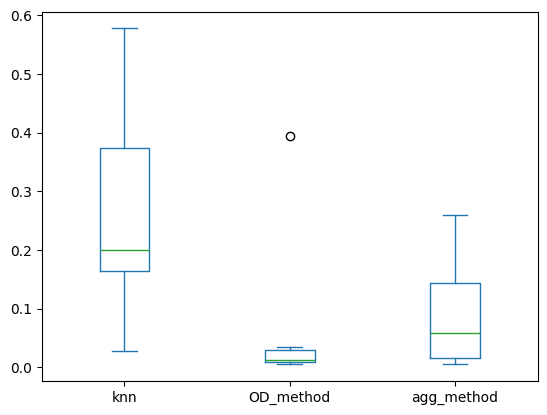

In [ ]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [ ]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.238521,0.004086,0.058360,0.0
1,0.059996,0.000567,0.056766,0.0


<Axes: >

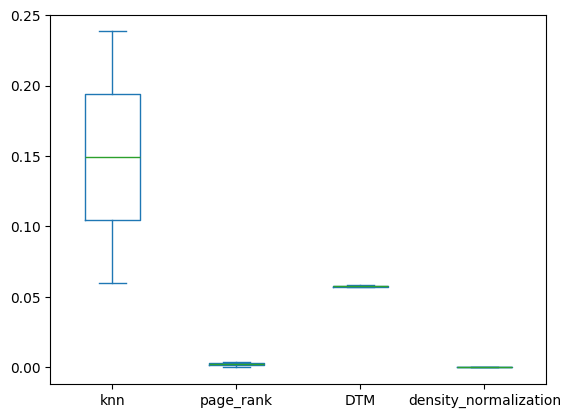

In [ ]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [ ]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.0,0.0,0.0
1,0.0,0.0,0.0


<Axes: >

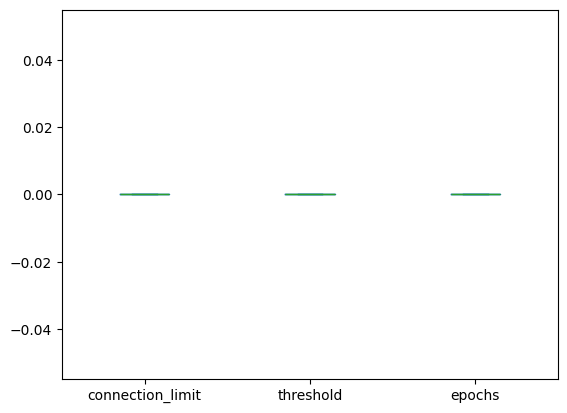

In [ ]:
mash_param_df.plot(kind = "box") 